In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mp_draw = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
cap = cv2.VideoCapture(0)

# setting up mediapipe instance for pose detections

with mp_pose.Pose(min_detection_confidence = 0.5,min_tracking_confidence = 0.5) as pose:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # recolor the img to RGB
        img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        img.flags.writeable = False
        
        # make detetions
        results = pose.process(img)
        
        # recolor the img to BGR
        img.flags.writeable = True
        img = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        
        
        # rendering detections
        mp_draw.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,
                              mp_draw.DrawingSpec(color=(255,0,0),thickness = 2,circle_radius = 1),
                              mp_draw.DrawingSpec(color=(255,0,255),thickness = 2,circle_radius = 1))
        
        cv2.imshow('Webcam Feed', img)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
results.pose_landmarks

In [ ]:
mp_pose.POSE_CONNECTIONS

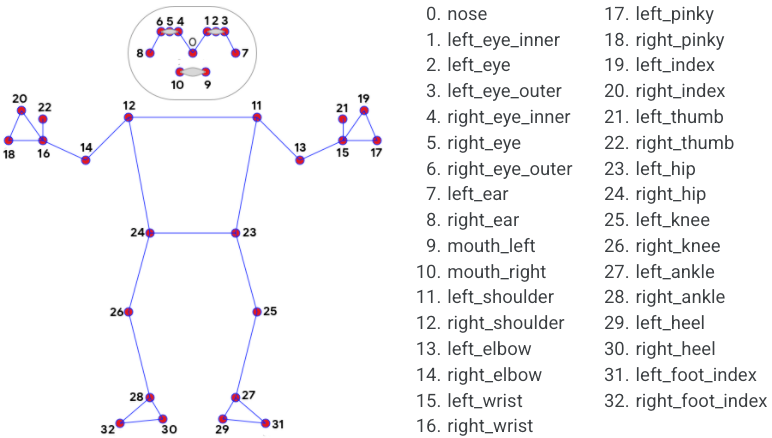

joint landmarks for pose and img taken from url :https://google.github.io/mediapipe/solutions/pose.html

In [ ]:
cap = cv2.VideoCapture(0)

# setting up mediapipe instance for pose detections

with mp_pose.Pose(min_detection_confidence = 0.5,min_tracking_confidence = 0.5) as pose:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # recolor the img to RGB
        img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        img.flags.writeable = False
        
        # make detetions
        results = pose.process(img)
        
        # recolor the img to BGR
        img.flags.writeable = True
        img = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        
        # extracting landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # rendering detections
        mp_draw.draw_landmarks(img,results.pose_landmarks,mp_pose.POSE_CONNECTIONS,
                              mp_draw.DrawingSpec(color=(255,0,0),thickness = 2,circle_radius = 1),
                              mp_draw.DrawingSpec(color=(255,0,255),thickness = 2,circle_radius = 1))
        
        cv2.imshow('Webcam Feed', img)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
landmarks

In [ ]:
len(landmarks)

In [ ]:
for x in mp_pose.PoseLandmark:
    print(x)

In [ ]:
mp_pose.PoseLandmark.NOSE.value

In [ ]:
mp_pose.PoseLandmark.NOSE

In [ ]:
mp_pose.PoseLandmark.LEFT_HIP.value

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].z

In [7]:
def cal_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

In [8]:
left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [ ]:
left_shoulder

In [ ]:
left_elbow

In [ ]:
left_wrist

In [ ]:
cal_angle(left_shoulder,left_elbow,left_wrist)

In [ ]:
tuple(np.multiply(left_elbow,[640,480]).astype(int))

In [13]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor img to RGB
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img.flags.writeable = False
      
        # Make detection
        results = pose.process(img)
    
        # Recolor back to BGR
        img.flags.writeable = True
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = cal_angle(left_shoulder, left_elbow, left_wrist)
            
            # Visualize angle
            cv2.putText(img, str(angle), 
                           tuple(np.multiply(left_elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                       
        except:
            pass
        
        
        # Render detections
        mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_draw.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_draw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', img)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [25]:
cap = cv2.VideoCapture(0)

# curl counter

counter = 0
stage = None

# Setting up mediapipe instance for pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor img to RGB
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img.flags.writeable = False
      
        # Making detections
        results = pose.process(img)
    
        # Recolor back to BGR
        img.flags.writeable = True
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        # Extracting landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = cal_angle(left_shoulder, left_elbow, left_wrist)
            
            # Visualizing  angle
            cv2.putText(img, str(angle), 
                           tuple(np.multiply(left_elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            
            # logic for curl counter
            
            if angle > 160:
                stage = 'down'
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter += 1
                print(counter)
                       
        except:
            pass
        
        # rendering curl counter by setting up a status box
        
        cv2.rectangle(img,(0,0),(225,73),(245,117,16),-1)
        
        # repitions data
        
        cv2.putText(img,'REPS',(15,12),
                    cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1,cv2.LINE_AA)
        cv2.putText(img,str(counter),(10,60),
                    cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),2,cv2.LINE_AA)
        
        
        
        
        # Rendering detections
        mp_draw.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_draw.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_draw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', img)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6


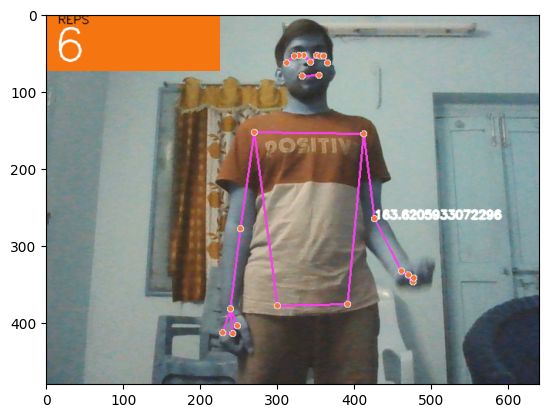

In [26]:
plt.imshow(img)
plt.show()

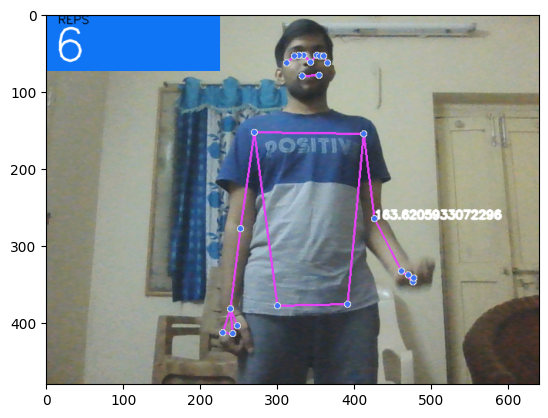

In [27]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()